<a href="https://colab.research.google.com/github/Kraykray69/MobilePricePrediction-All-Models-/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data and libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

Load the data

In [2]:
data = pd.read_csv('/content/Mobile_data.csv')

About the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


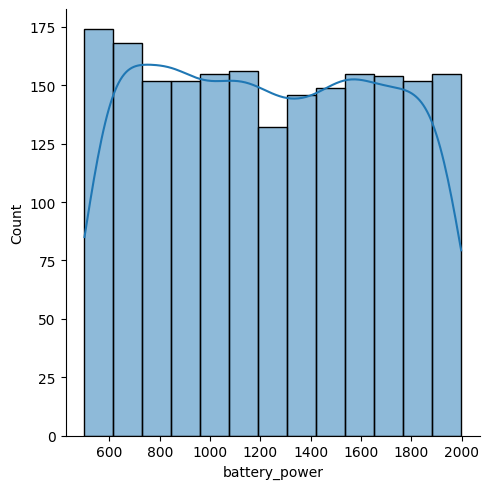

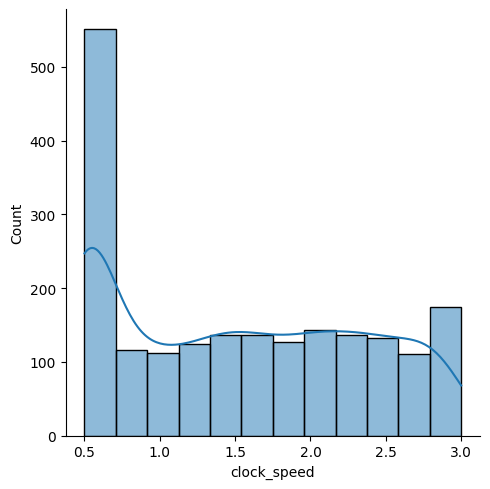

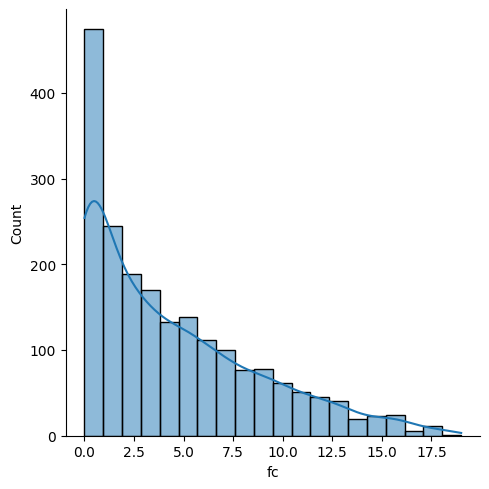

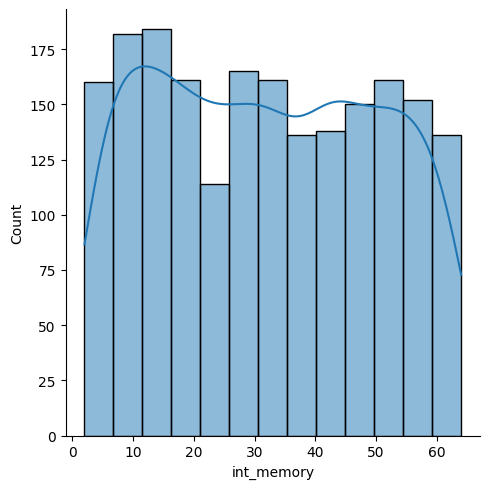

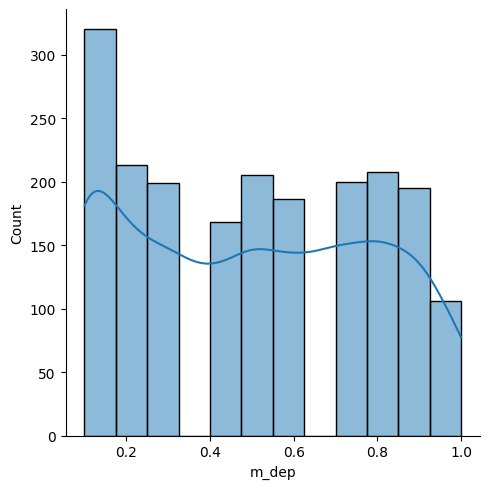

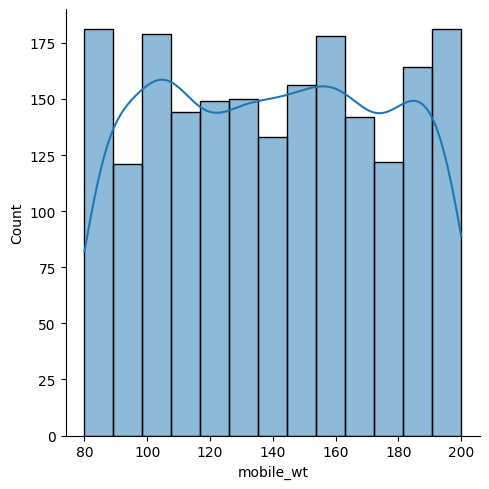

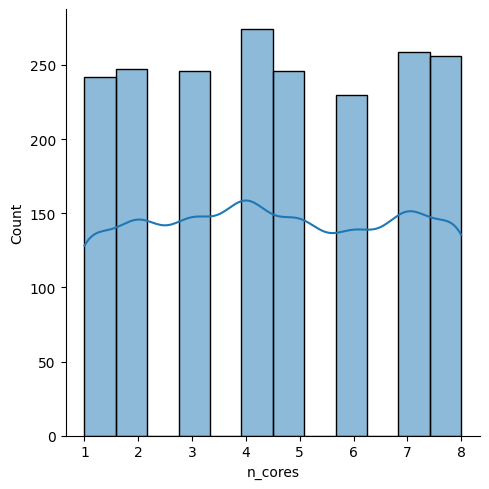

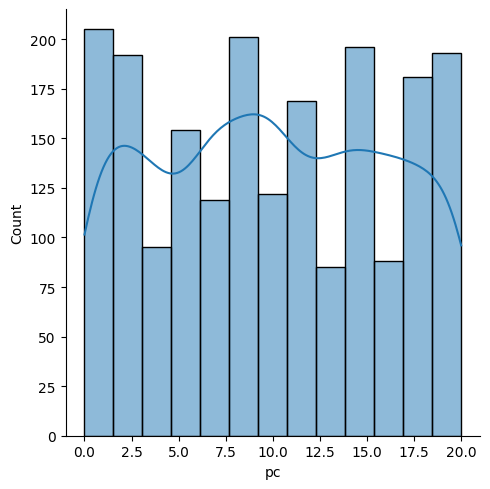

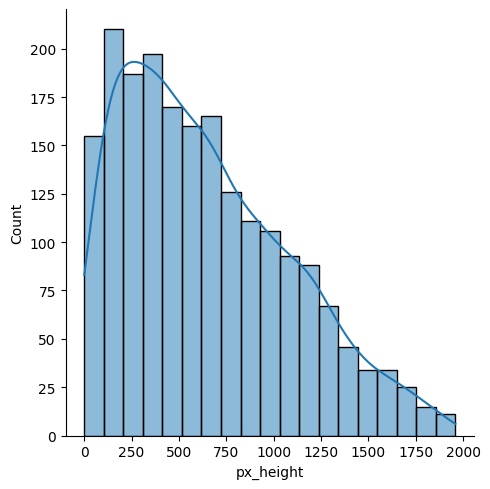

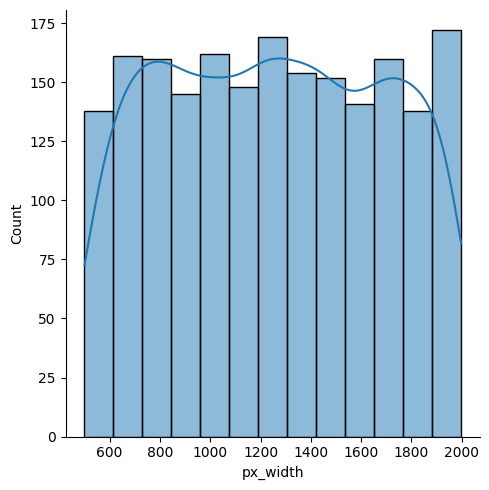

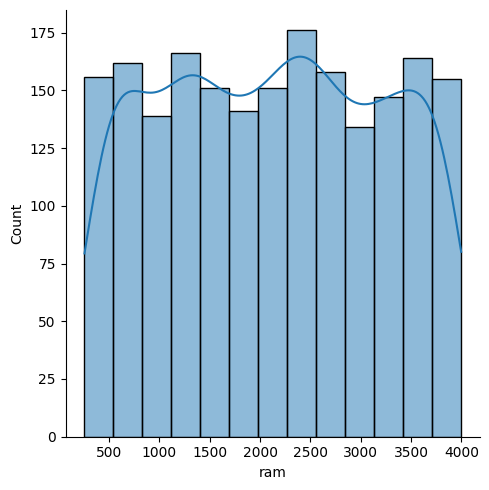

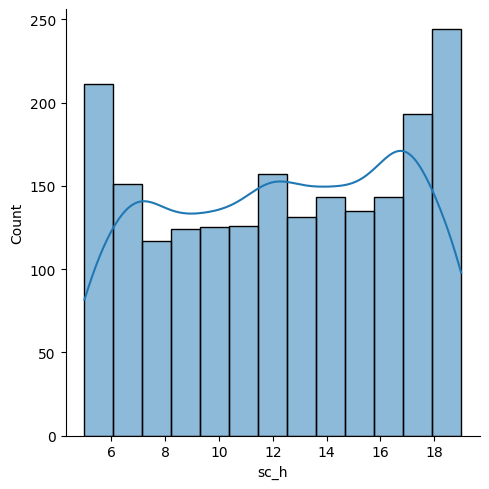

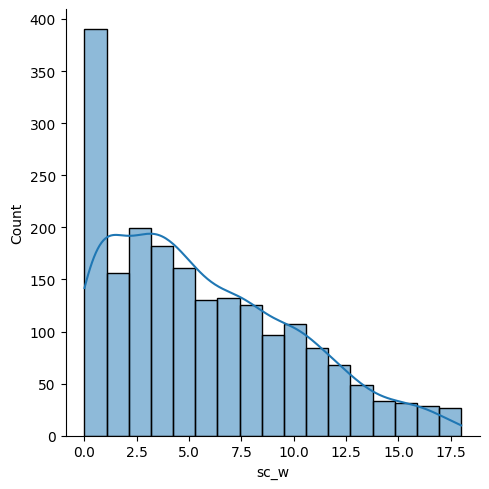

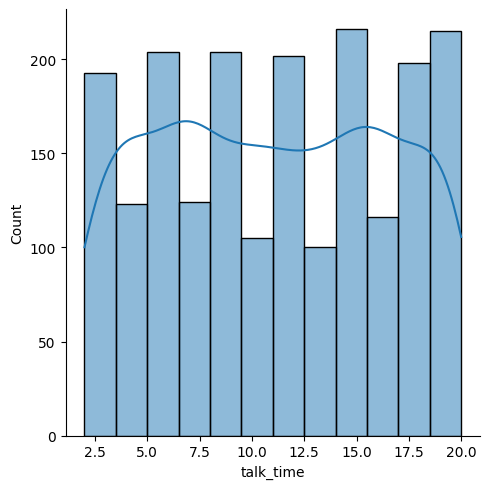

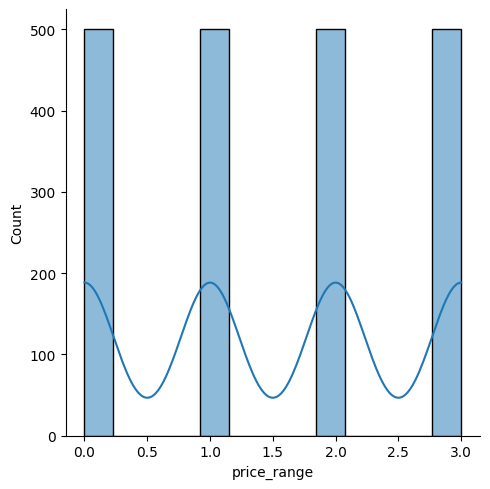

In [4]:
for i in data.columns:
  sns.displot(data[i],kde=True)

In [5]:
data.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [6]:
data.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

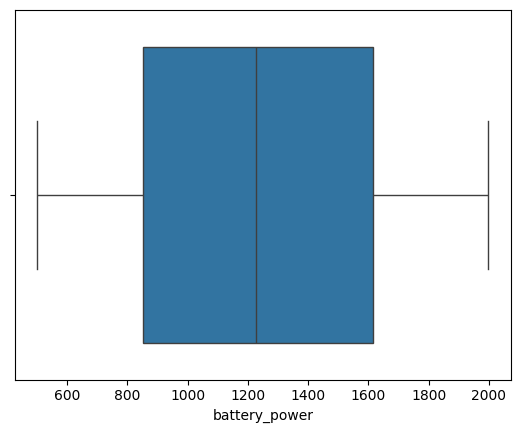

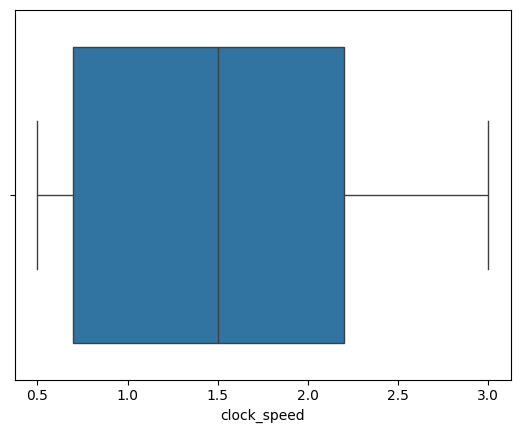

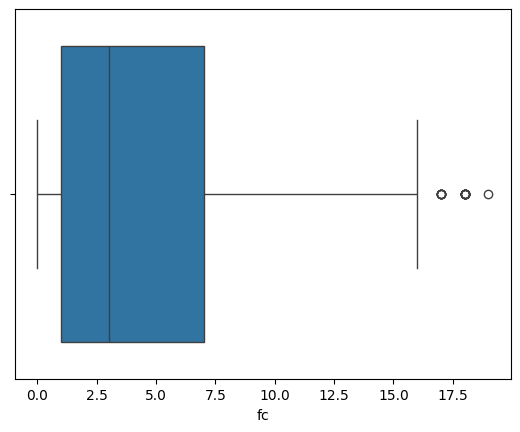

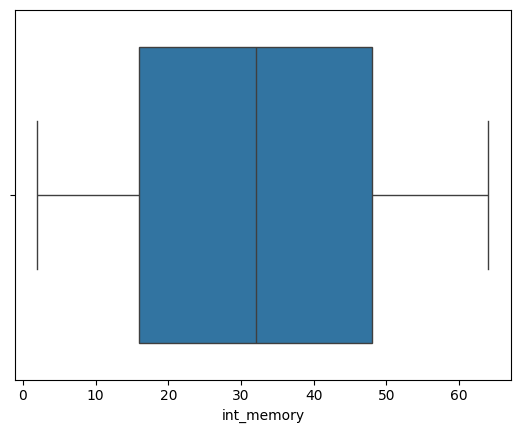

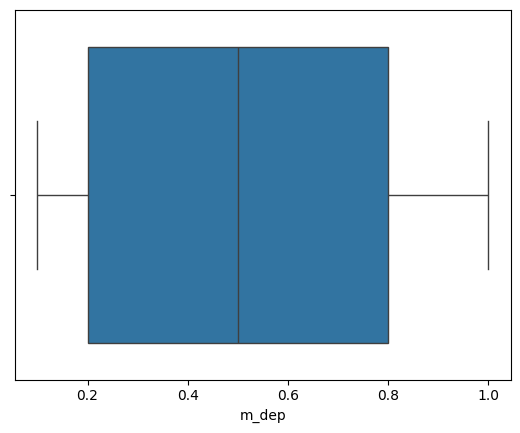

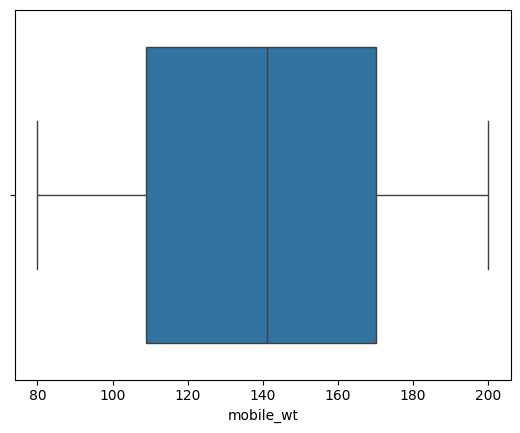

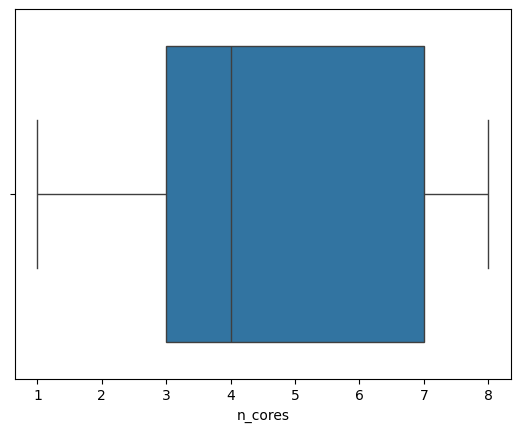

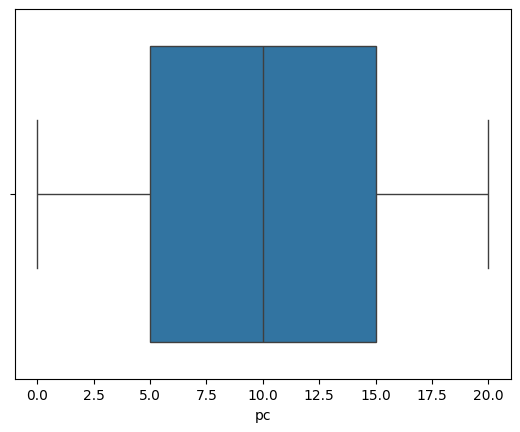

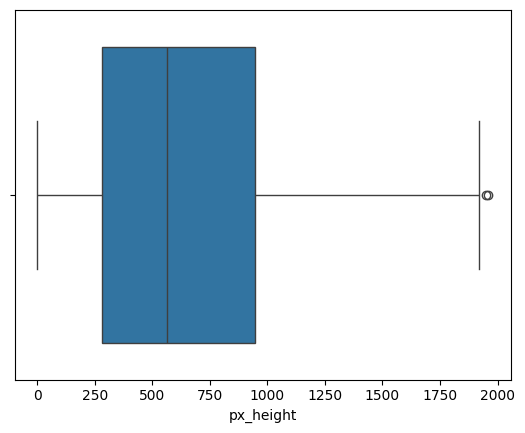

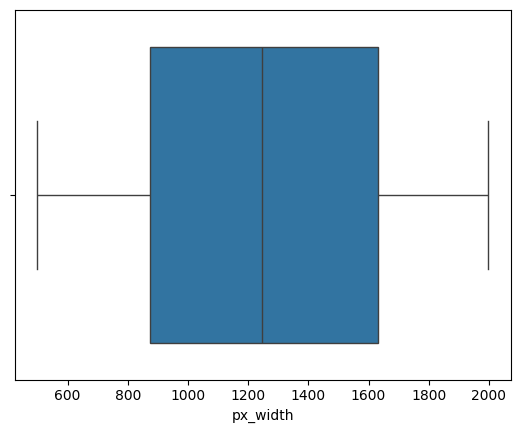

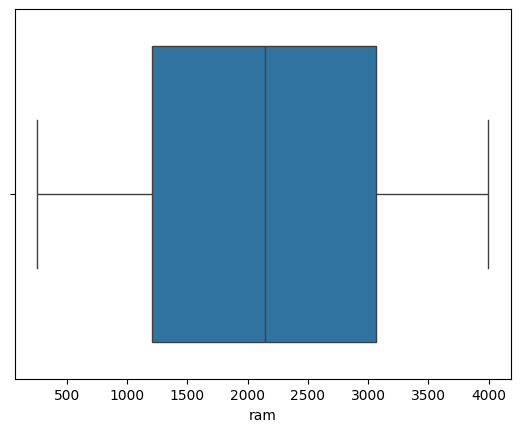

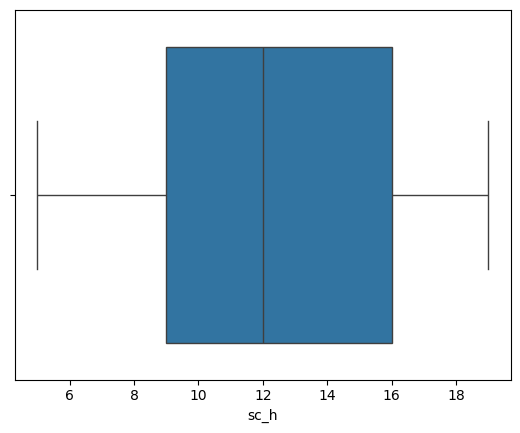

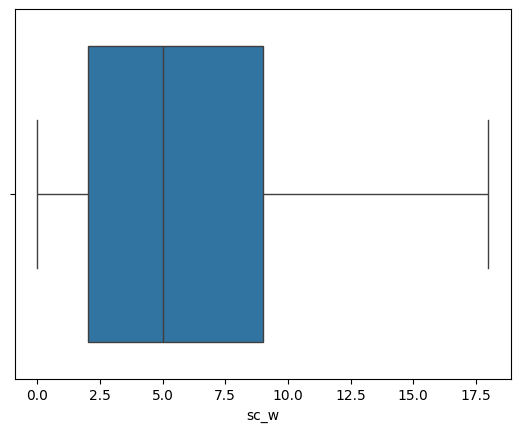

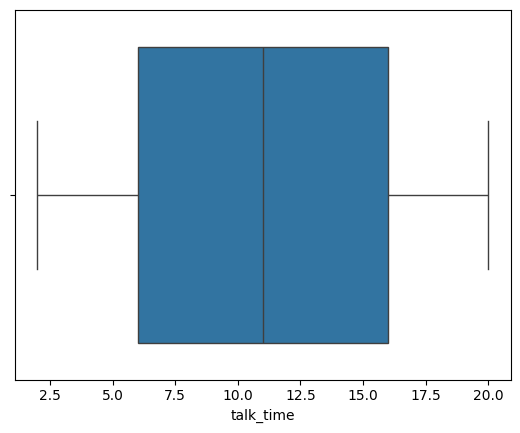

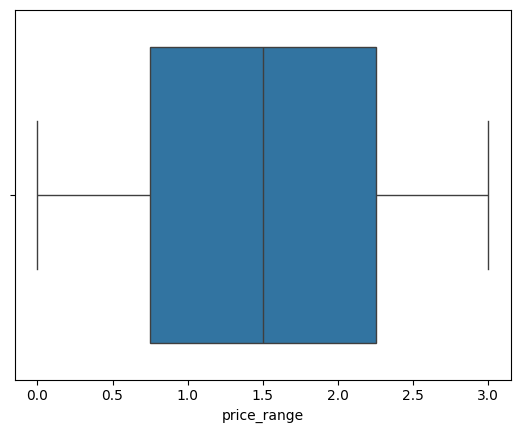

In [7]:
for i in data.columns:
  sns.boxplot(data=data,x=i)
  plt.show()

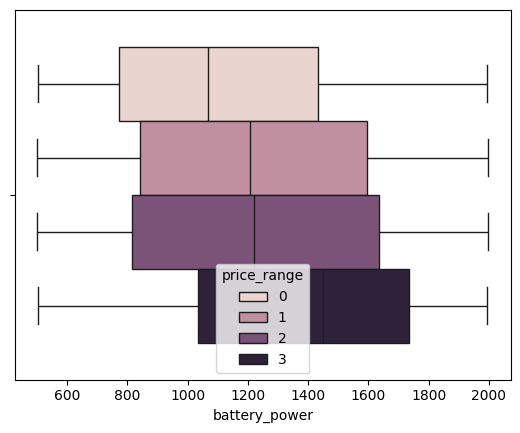

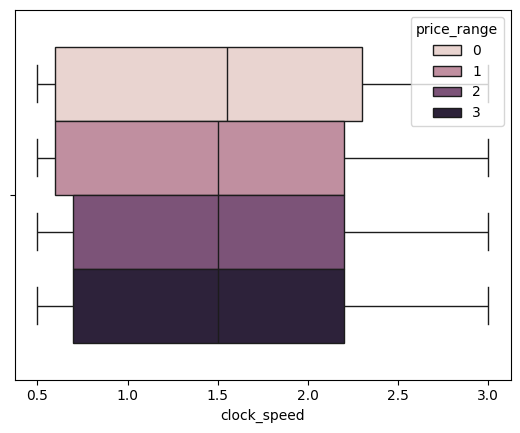

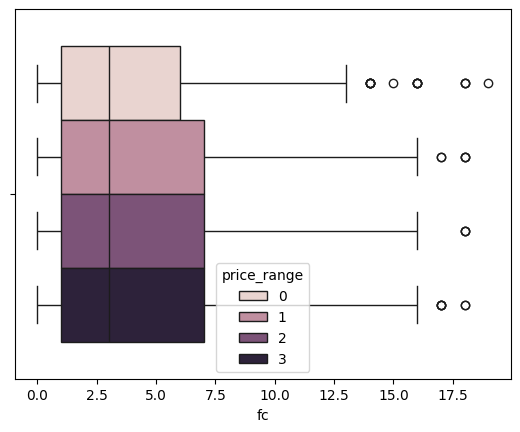

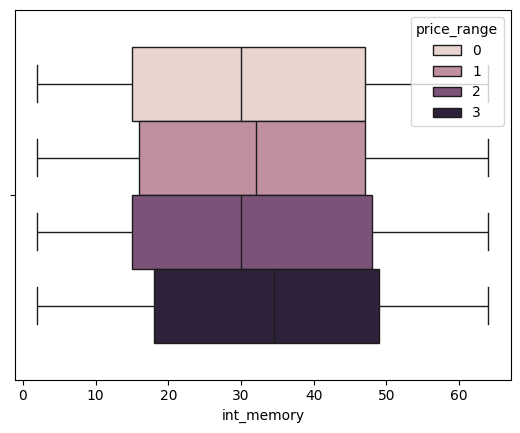

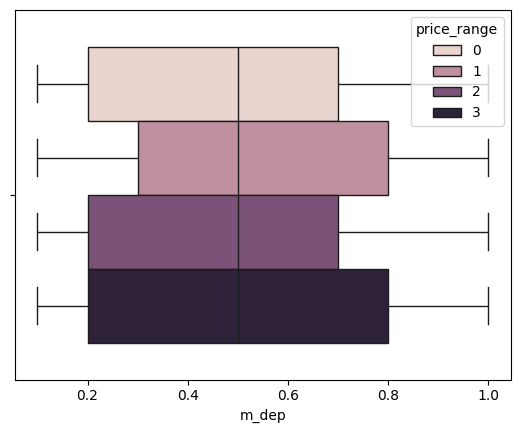

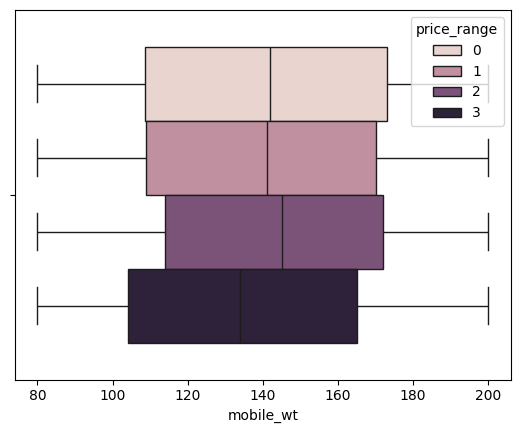

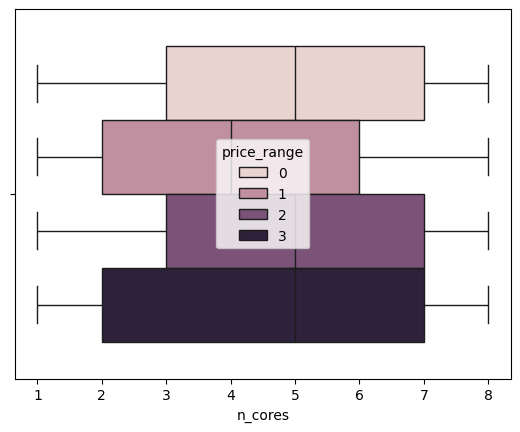

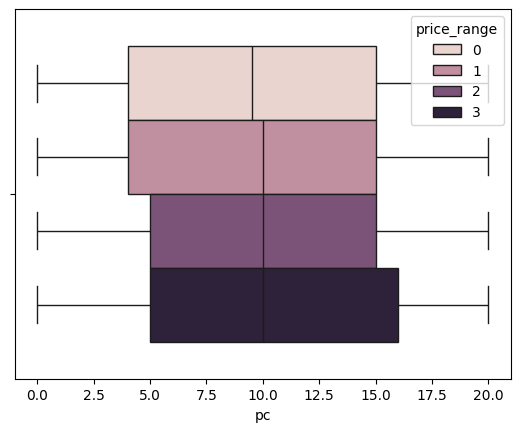

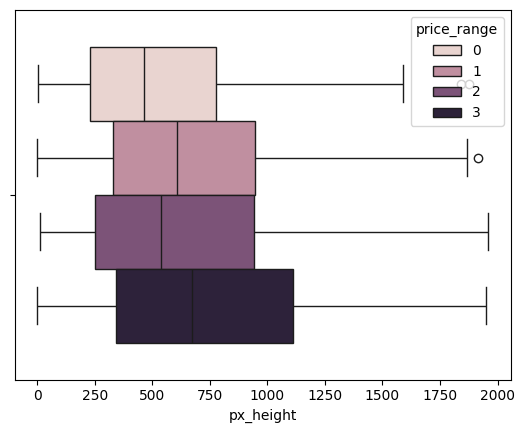

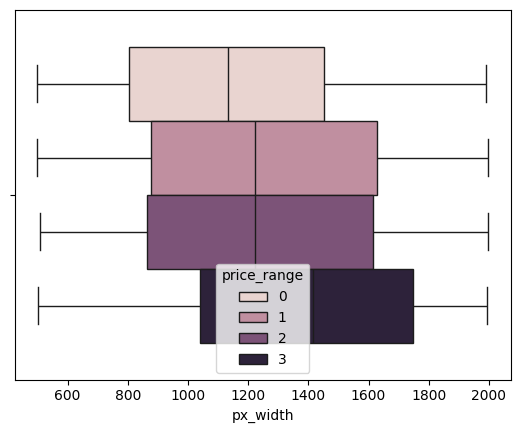

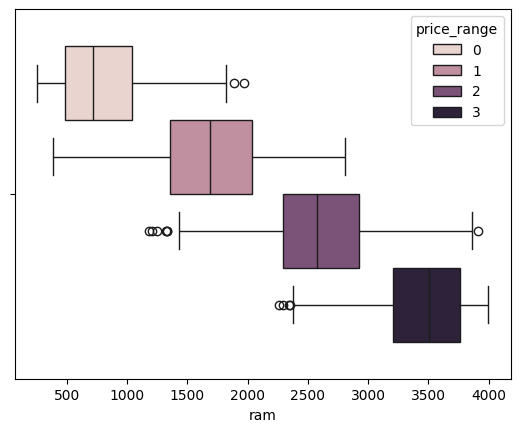

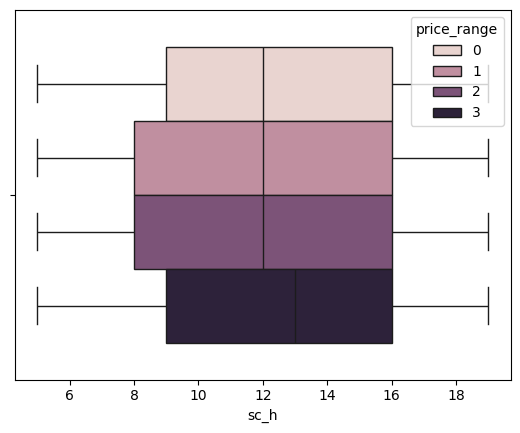

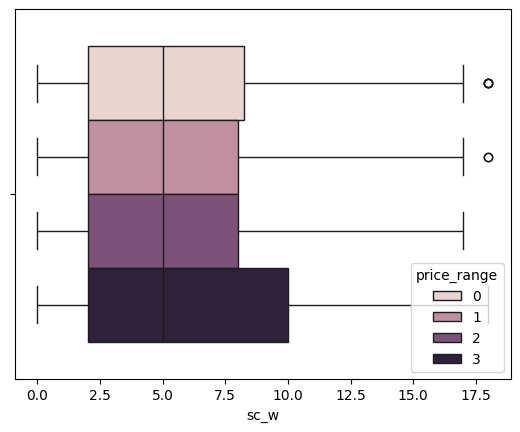

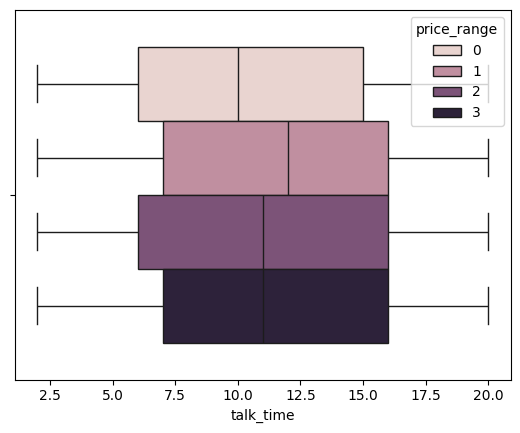

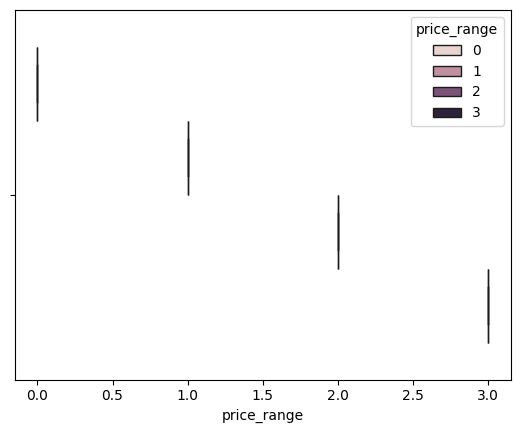

In [8]:
for i in data.columns:
  sns.boxplot(x=data[i],hue=data['price_range'])
  plt.show()

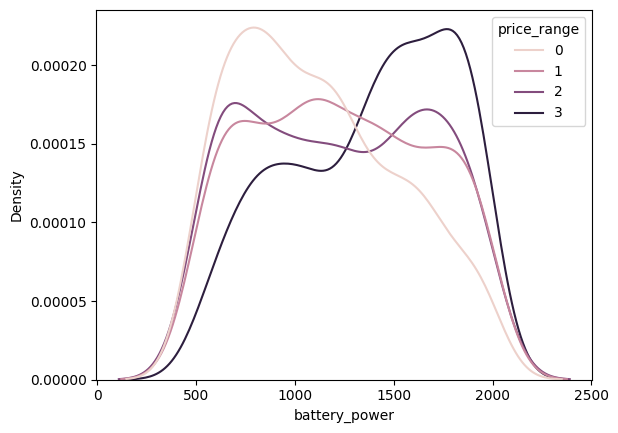

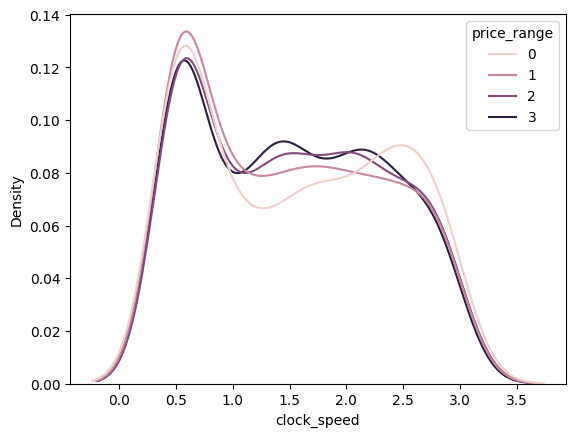

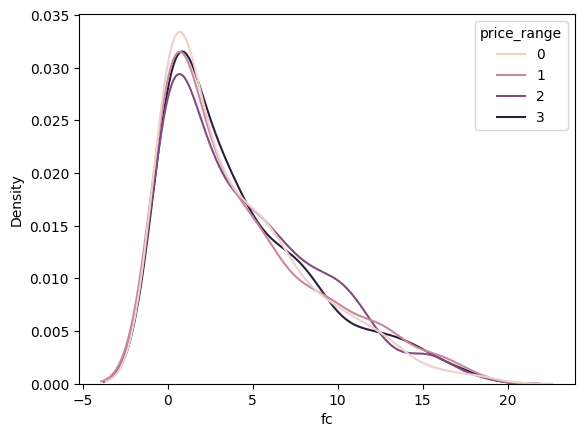

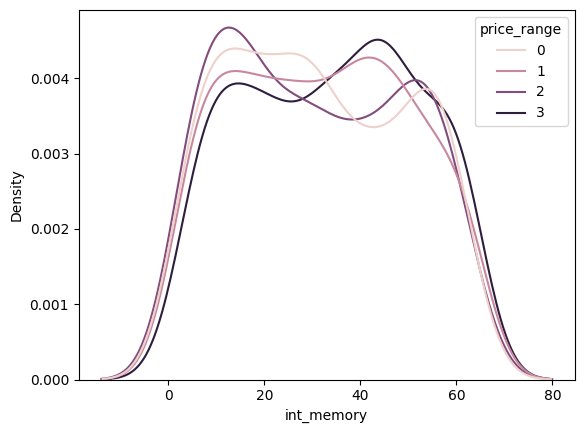

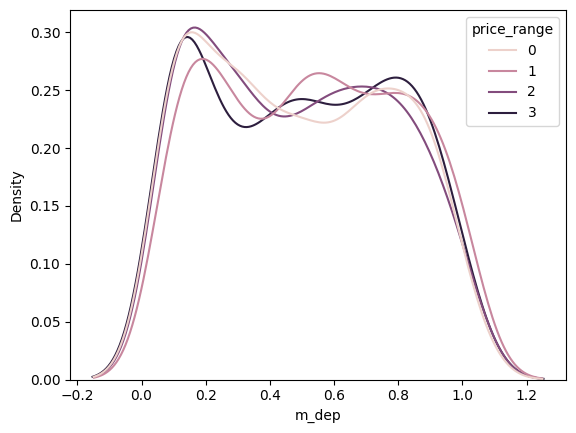

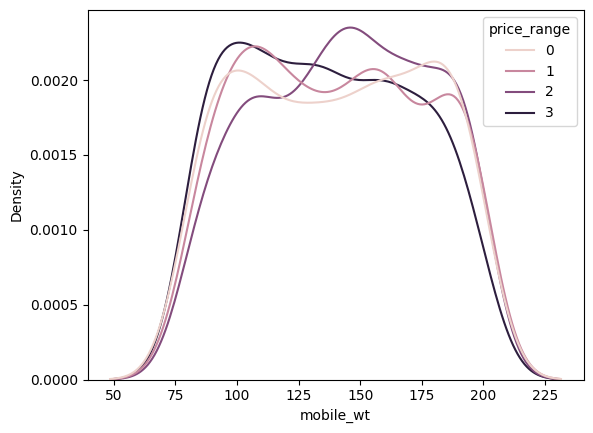

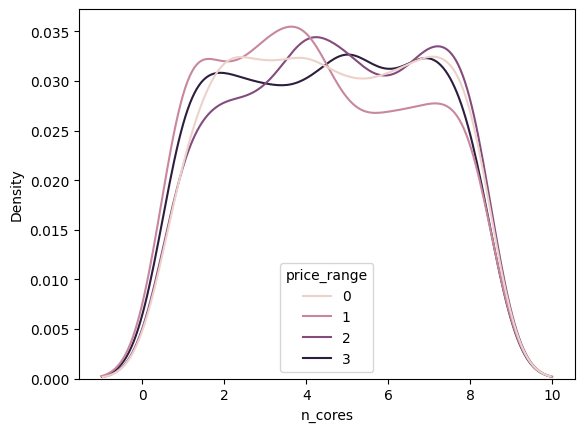

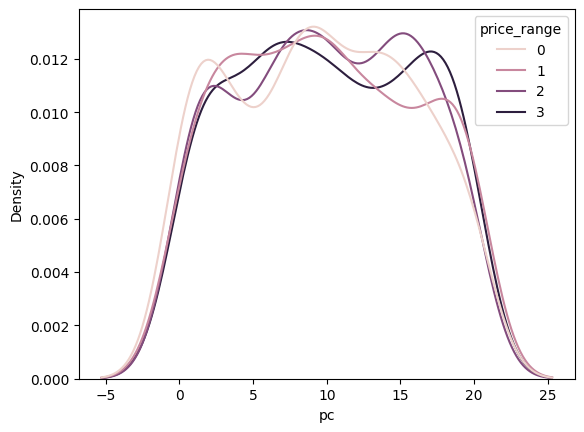

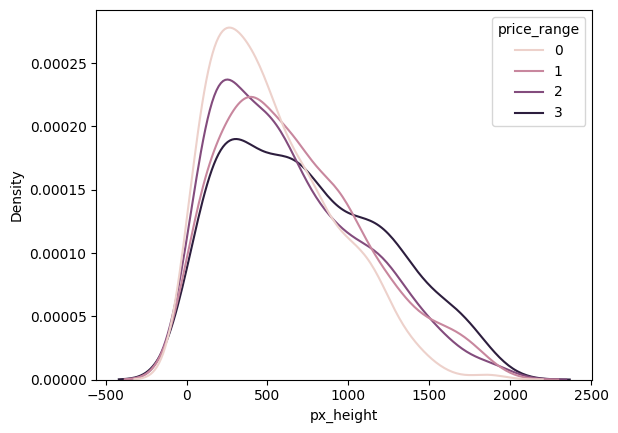

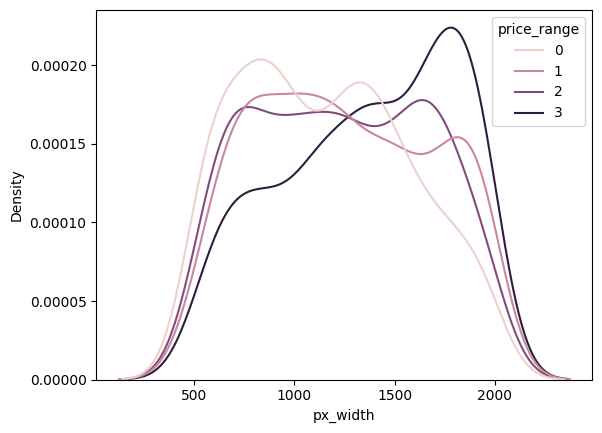

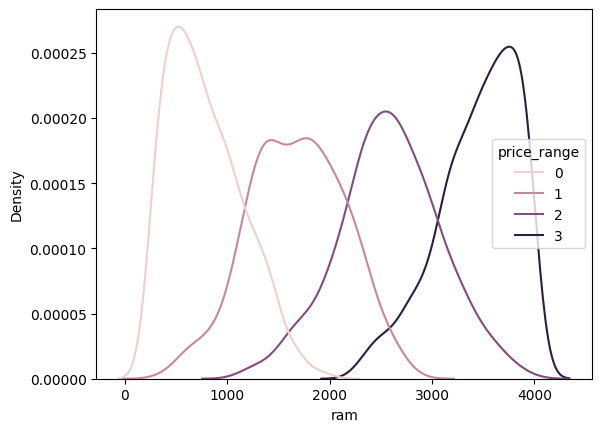

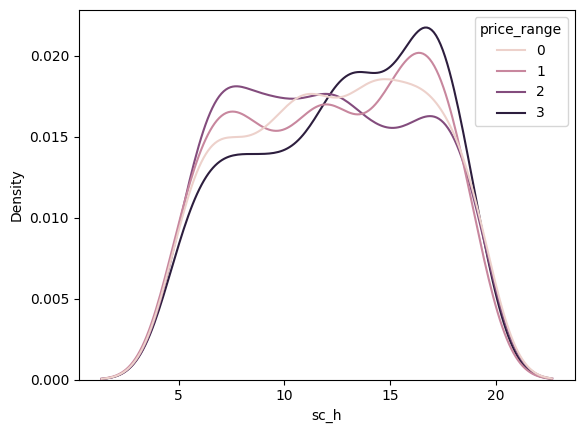

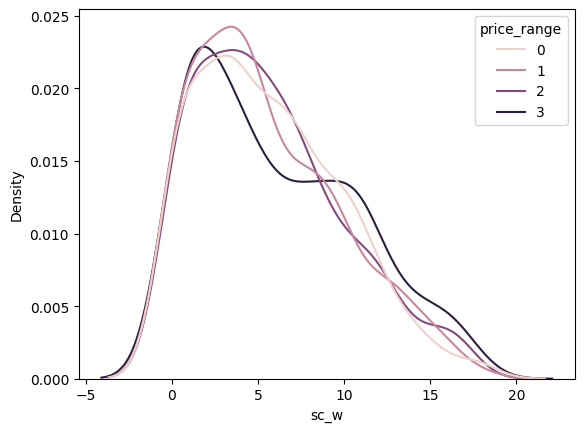

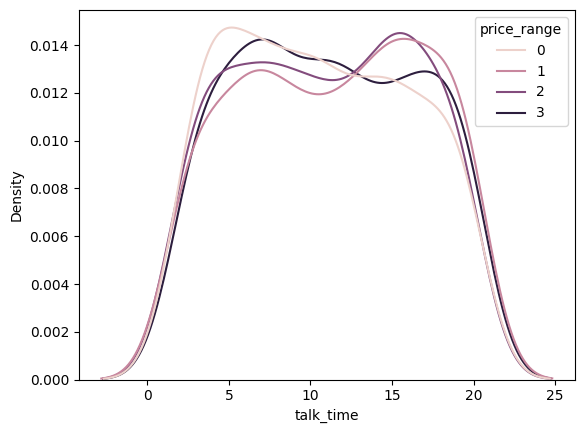

<ipython-input-9-ea374eafa0a4>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data,x=data[i],hue=data['price_range'])


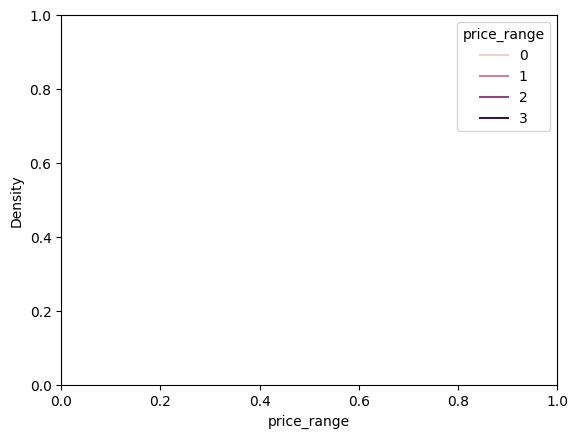

In [9]:
for i in data.columns:
  sns.kdeplot(data=data,x=data[i],hue=data['price_range'])
  plt.show()

# Bi-Variate Analysis

<Axes: >

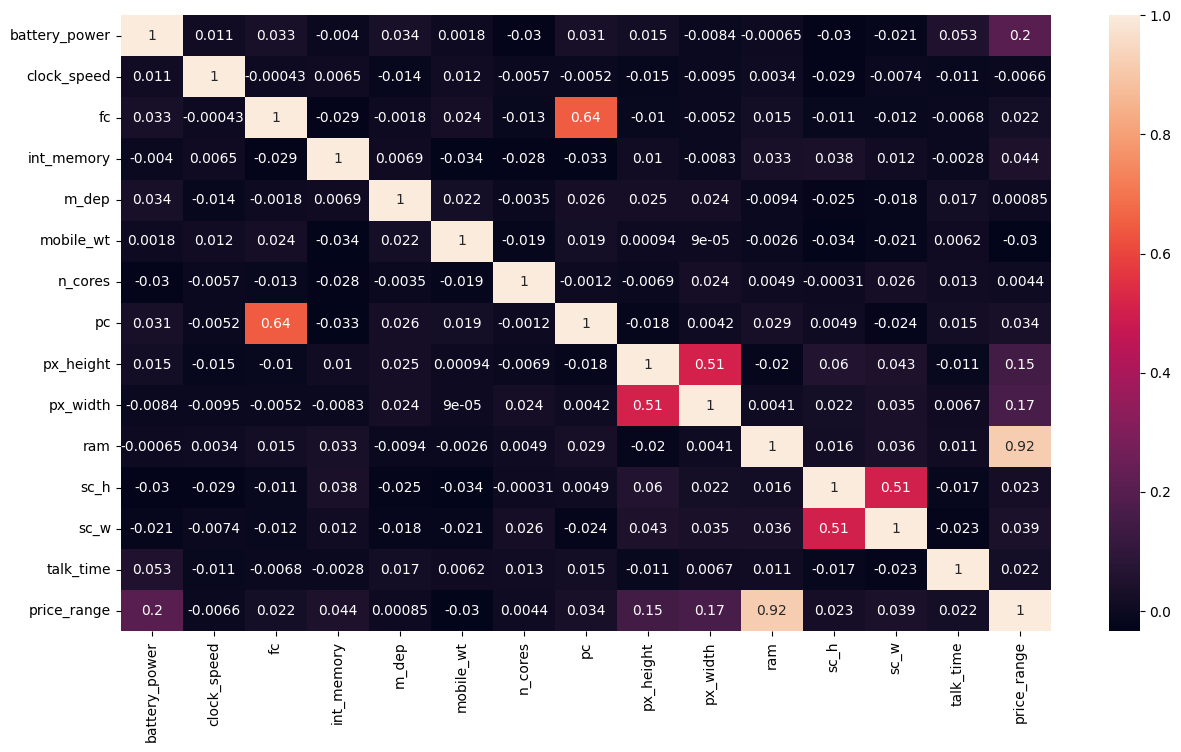

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

# Splitting of data

In [11]:
x=data.drop(['price_range'],axis=1)
y=data['price_range']

In [12]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: price_range
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 14)
(400, 14)
(1600,)
(400,)


# Logistic Regression

In [15]:
logreg = LogisticRegression(max_iter=2000)
#Fit the model
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [16]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

In [17]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  class_report = classification_report(actual,predicted)
  print("The accuracy score of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(class_report)

In [18]:
model_eval(y_train,y_hat_train)

The accuracy score of the model is: 0.72
[[355  57   1   0]
 [ 49 259  83   9]
 [  1  78 211  94]
 [  0   1  77 325]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       413
           1       0.66      0.65      0.65       400
           2       0.57      0.55      0.56       384
           3       0.76      0.81      0.78       403

    accuracy                           0.72      1600
   macro avg       0.71      0.72      0.71      1600
weighted avg       0.72      0.72      0.72      1600



In [19]:
model_eval(y_test,y_hat_test)

The accuracy score of the model is: 0.72
[[76 11  0  0]
 [16 64 16  4]
 [ 0 19 63 34]
 [ 0  0 12 85]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        87
           1       0.68      0.64      0.66       100
           2       0.69      0.54      0.61       116
           3       0.69      0.88      0.77        97

    accuracy                           0.72       400
   macro avg       0.72      0.73      0.72       400
weighted avg       0.72      0.72      0.71       400



# Decision Tree

In [20]:
dtree = DecisionTreeClassifier(max_depth=4)
#Fit the model
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [21]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [22]:
model_eval(y_train,y_hat_train_dtree)

The accuracy score of the model is: 0.83
[[389  24   0   0]
 [ 39 349  12   0]
 [  0 118 214  52]
 [  0   1  28 374]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.71      0.87      0.78       400
           2       0.84      0.56      0.67       384
           3       0.88      0.93      0.90       403

    accuracy                           0.83      1600
   macro avg       0.83      0.82      0.82      1600
weighted avg       0.84      0.83      0.82      1600



In [23]:
model_eval(y_test,y_hat_test_dtree)

The accuracy score of the model is: 0.77
[[79  8  0  0]
 [15 78  7  0]
 [ 0 37 61 18]
 [ 0  0  8 89]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        87
           1       0.63      0.78      0.70       100
           2       0.80      0.53      0.64       116
           3       0.83      0.92      0.87        97

    accuracy                           0.77       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.78      0.77      0.76       400



In [24]:
importances = dtree.feature_importances_
feat_imp = pd.Series(dtree.feature_importances_,index=x.columns).sort_values(ascending=False)



In [25]:
feat_imp

ram              0.860306
battery_power    0.077614
px_height        0.032999
px_width         0.029081
clock_speed      0.000000
fc               0.000000
int_memory       0.000000
m_dep            0.000000
mobile_wt        0.000000
n_cores          0.000000
pc               0.000000
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
dtype: float64

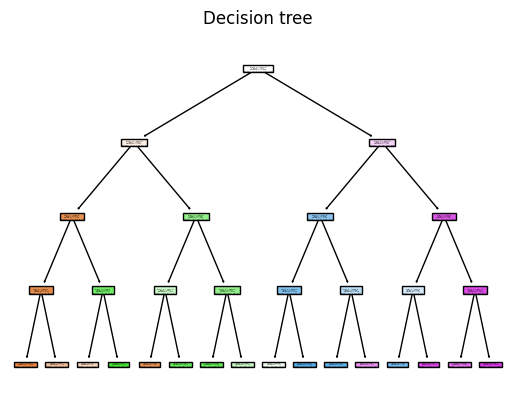

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
plot_tree(dtree, filled=True)
plt.title("Decision tree")
plt.show()

# Random Forest

In [27]:
rf = RandomForestClassifier()
#Fit the model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [29]:
model_eval(y_train,y_hat_train_rf)

The accuracy score of the model is: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [30]:
model_eval(y_test,y_hat_test_rf)

The accuracy score of the model is: 0.88
[[86  1  0  0]
 [ 7 87  6  0]
 [ 0 12 92 12]
 [ 0  0  8 89]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.87      0.87      0.87       100
           2       0.87      0.79      0.83       116
           3       0.88      0.92      0.90        97

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.88      0.89      0.88       400



# AdaBoost

In [31]:
abc = AdaBoostClassifier()
#Fit the model
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [32]:
y_hat_train_abc = abc.predict(x_train)
y_hat_test_abc = abc.predict(x_test)

In [33]:
model_eval(y_train,y_hat_train_abc)

The accuracy score of the model is: 0.77
[[275 138   0   0]
 [ 31 303  66   0]
 [  0  37 314  33]
 [  0   0  68 335]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.76       413
           1       0.63      0.76      0.69       400
           2       0.70      0.82      0.75       384
           3       0.91      0.83      0.87       403

    accuracy                           0.77      1600
   macro avg       0.79      0.77      0.77      1600
weighted avg       0.79      0.77      0.77      1600



In [34]:
model_eval(y_test,y_hat_test_abc)

The accuracy score of the model is: 0.78
[[56 31  0  0]
 [11 71 18  0]
 [ 0  8 99  9]
 [ 0  0 13 84]]
              precision    recall  f1-score   support

           0       0.84      0.64      0.73        87
           1       0.65      0.71      0.68       100
           2       0.76      0.85      0.80       116
           3       0.90      0.87      0.88        97

    accuracy                           0.78       400
   macro avg       0.79      0.77      0.77       400
weighted avg       0.78      0.78      0.78       400



# Gradient Boosting

In [35]:
gbm = GradientBoostingClassifier()
#Fit the model
gbm.fit(x_train,y_train)

GradientBoostingClassifier()

In [36]:
y_hat_train_gbm = gbm.predict(x_train)
y_hat_test_gbm = gbm.predict(x_test)

In [37]:
model_eval(y_train,y_hat_train_gbm)

The accuracy score of the model is: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 383   1]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [38]:
model_eval(y_test,y_hat_test_gbm)

The accuracy score of the model is: 0.9
[[84  3  0  0]
 [ 7 89  4  0]
 [ 0  9 98  9]
 [ 0  0  7 90]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        87
           1       0.88      0.89      0.89       100
           2       0.90      0.84      0.87       116
           3       0.91      0.93      0.92        97

    accuracy                           0.90       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.90      0.90      0.90       400



In [39]:
#Random Forest
#AdaBoost
#GradientBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=3,estimators=50)
xgb.fit(x_train,y_train)
y_hat_train_xgb = xgb.predict(x_train)
y_hat_test_xgb = xgb.predict(x_test)
model_eval(y_train,y_hat_train_xgb)
model_eval(y_test,y_hat_test_xgb)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:57:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "estimators" } are not used.

  warnings.warn(smsg, UserWarning)


The accuracy score of the model is: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

The accuracy score of the model is: 0.92
[[ 85   2   0   0]
 [  4  91   5   0]
 [  0   8 101   7]
 [  0   0   8  89]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        87
           1       0.90      0.91      0.91       100
           2       0.89      0.87      0.88       116
           3       0.93      0.92      0.92        97

    accuracy                           0.92       400
   m

# K-Nearest Neighbour

In [ ]:
a =

In [52]:
knn = KNeighborsClassifier(n_neighbors=4)
#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [53]:
y_hat_train_knn = knn.predict(x_train)
y_hat_test_knn = knn.predict(x_test)
model_eval(y_train,y_hat_train_knn)

The accuracy score of the model is: 0.95
[[412   1   0   0]
 [ 19 376   5   0]
 [  0  21 358   5]
 [  0   0  24 379]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       413
           1       0.94      0.94      0.94       400
           2       0.93      0.93      0.93       384
           3       0.99      0.94      0.96       403

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [54]:
model_eval(y_test,y_hat_test_knn)

The accuracy score of the model is: 0.92
[[ 86   1   0   0]
 [  7  91   2   0]
 [  0   8 104   4]
 [  0   0   8  89]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.91      0.91      0.91       100
           2       0.91      0.90      0.90       116
           3       0.96      0.92      0.94        97

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.92       400



In [70]:
acc_score_list = []
for i in range(1,100):
  knn_1 = KNeighborsClassifier(n_neighbors=i)
  knn_1.fit(x_train,y_train)
  y_hat_train_knn_1 = knn_1.predict(x_train)
  y_hat_test_knn_1 = knn_1.predict(x_test)
  acc_score_list.append(accuracy_score(y_test,y_hat_test_knn_1))

In [71]:
acc_score_list

[0.885,
 0.905,
 0.92,
 0.925,
 0.9275,
 0.9275,
 0.9325,
 0.93,
 0.9325,
 0.9325,
 0.9225,
 0.9225,
 0.9275,
 0.93,
 0.925,
 0.9275,
 0.93,
 0.93,
 0.925,
 0.9275,
 0.9225,
 0.9225,
 0.925,
 0.9175,
 0.915,
 0.92,
 0.92,
 0.9225,
 0.9275,
 0.9225,
 0.93,
 0.925,
 0.9275,
 0.92,
 0.925,
 0.9175,
 0.9275,
 0.9225,
 0.9225,
 0.9175,
 0.9175,
 0.92,
 0.9175,
 0.9175,
 0.9175,
 0.9125,
 0.9125,
 0.9075,
 0.915,
 0.9075,
 0.905,
 0.9075,
 0.9075,
 0.9075,
 0.9125,
 0.91,
 0.9125,
 0.905,
 0.9075,
 0.905,
 0.905,
 0.905,
 0.905,
 0.905,
 0.91,
 0.9025,
 0.9,
 0.9025,
 0.8975,
 0.905,
 0.905,
 0.91,
 0.9075,
 0.91,
 0.9025,
 0.91,
 0.9075,
 0.905,
 0.9075,
 0.9025,
 0.905,
 0.9025,
 0.8975,
 0.9025,
 0.9025,
 0.905,
 0.9075,
 0.9075,
 0.9025,
 0.9025,
 0.9,
 0.9,
 0.8975,
 0.905,
 0.9025,
 0.9025,
 0.9025,
 0.905,
 0.905]

<Axes: >

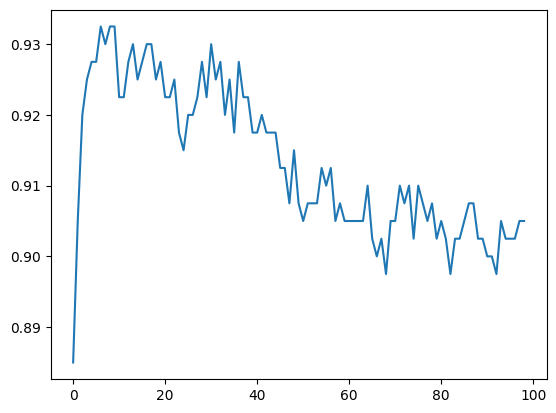

In [81]:
sns.lineplot(acc_score_list)

In [66]:
knn = KNeighborsClassifier(n_neighbors=8)
#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [67]:
y_hat_train_knn = knn.predict(x_train)
y_hat_test_knn = knn.predict(x_test)

In [68]:
model_eval(y_train,y_hat_train_knn)

The accuracy score of the model is: 0.95
[[408   5   0   0]
 [ 17 374   9   0]
 [  0  21 354   9]
 [  0   0  24 379]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       413
           1       0.94      0.94      0.94       400
           2       0.91      0.92      0.92       384
           3       0.98      0.94      0.96       403

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [69]:
model_eval(y_test,y_hat_test_knn)

The accuracy score of the model is: 0.93
[[ 86   1   0   0]
 [  7  93   0   0]
 [  0   9 103   4]
 [  0   0   7  90]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.90      0.93      0.92       100
           2       0.94      0.89      0.91       116
           3       0.96      0.93      0.94        97

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

